
### Modeling and Evaluation Notebook

**Objectives**
- Answer business requirement 2:
    + The client is interested in predicting if a cherry tree is healthy or contains powdery mildew.

**Inputs**
- inputs/cherry_leaves_dataset/cherry-leaves/train/
- inputs/cherry_leaves_dataset/cherry-leaves/test/
- inputs/cherry_leaves_dataset/cherry-leaves/validation/
- image_embeddings

**Outputs**
1. Images distribution plot in train, validation, and test set
2. Image augmentation
3. Save class_indices
4. Machine learning model creation and training

5. Save model
- It saves the entire trained model to a file in the HDF5 format. 
- This file includes:
    + The model architecture.
    + The model weights.
    + The training configuration (loss, optimizer).
    + The state of the optimizer, so training can be resumed exactly where it was left off.
    
6. Learning curve plot for model performance
- To visually represents the model's learning progression in order to identify issues like overfitting or underfitting.

7. Model evaluation on pickle file
8. Prediction on the random image file
9. Model evaluation results with precision_score, recall_score, f1_score metrics, Confusion Matrix, and ROC curve.
10. Hypothesis on Image Resolution
11. Hypothesis on Data Augmentation

**Additional Comments | Insights | Conclusions**

____________________________________________________________________________________

### **Set Data Directory**
__________________________________________________________________________________________

**Import libraries**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-13 04:40:38.007042: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Set Working Directory**

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('/workspace/mildew-detection-in-cherry-leaves')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detection-in-cherry-leaves'

**Set input directories**

Set train, validation and test paths

In [5]:
my_data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

**Set output directory**


- Organize files in a version-controlled manner
- This code is checking if a specific version of output files or directories already exists, and if it does, it suggests that a new version should be created. 
- If the version does not exist, it creates the necessary directory structure to store the files for that version.

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available create a new version.


**Set labels names**

In [7]:
labels = os.listdir(train_path)
print('Label for the images are',labels)

Label for the images are ['healthy', 'powdery_mildew']


**Set image file size embeddings**

In [8]:
version = 'v1'
image_size = joblib.load('outputs/v1/image_embeddings.joblib')
image_size

{'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/9887e26f-07b6-4536-86a0-3c5c6d0fbc31___JR_HL 9505_flipTB.JPG': array([3.5895555 , 0.01103318, 1.0768092 , ..., 1.5545986 , 1.9767038 ,
        0.05459519], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/517b275d-ef1e-49b1-be9e-c7dcc95dab00___JR_HL 3988_flipTB.JPG': array([3.2477908 , 0.0148669 , 0.25788572, ..., 0.8149272 , 1.1350145 ,
        0.00446352], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/b8b81fac-673a-4f90-849e-b1fa9cd255df___JR_HL 4060.JPG': array([1.7621852 , 0.17557903, 0.66783327, ..., 0.7379321 , 0.5391485 ,
        0.57453585], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/904d2f33-6bcd-45f6-9732-1d438165d525___JR_HL 4295_180deg.JPG': array([4.6380234 , 0.29061383, 1.1129715 , ..., 0.27455303, 0.29167637,
        0.13717976], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/e784cda7-7006-44e5-9578-

____________________________________________________________________________________________________

### Data Distribution
_________________________________________________________________________________

1. **Images distribution plot in train, validation, and test set**

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




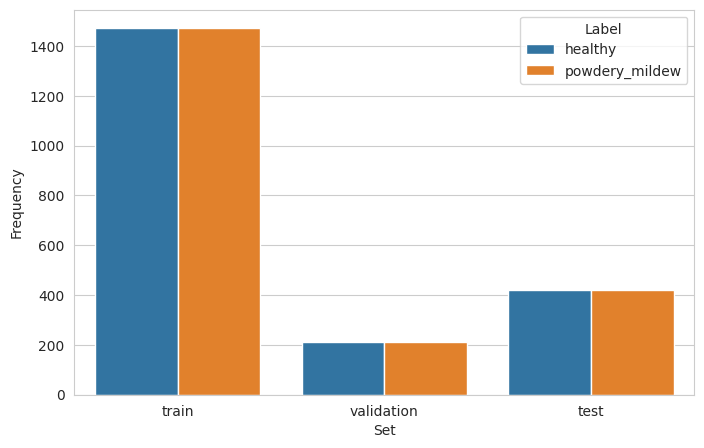

In [9]:
# Initialize a list to store the data
data = []

# Iterate through each set (train, validation, test)
for folder in ['train', 'validation', 'test']:
    # Iterate through each label within the folder
    for label in labels:
        path = os.path.join(my_data_dir, folder, label)
        if os.path.exists(path):
            # Count the number of images in each label's directory
            image_count = len(os.listdir(path)) if os.path.exists(path) else 0

        # Append a new row to the data list with the count information
        data.append({'Set': folder, 'Label': label, 'Frequency': image_count})

        # Print out the count of images for each label within each set
        print(f"* {folder} - {label}: {image_count} images")

# Print a newline for neatness in output
print("\n")

# Create the DataFrame after collecting all data
df_freq = pd.DataFrame(data)

# Set the style of the plot to 'whitegrid' for better grid visibility
sns.set_style("whitegrid")

# Create a figure for the plot with specified size
plt.figure(figsize=(8, 5))

# Generate a bar plot from the frequency DataFrame
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')

# Specify the file path to save the generated bar plot
plt.savefig(os.path.join(file_path, 'labels_distribution.png'), bbox_inches='tight', dpi=150)

# Display the plot
plt.show()


__________________________________________________________________________________
### Data Augmentation
__________________________________________________________________________________

2. **Image data augmentation**

Intiatize ImageDataGenerator

In [10]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10,
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

Augment training image dataset

In [11]:
batch_size = 20
train_set = augmented_image_data.flow_from_directory(train_path,
                                              target_size=(100, 100),
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment validation image dataset

In [12]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                          target_size=(100, 100),
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment test image dataset

In [13]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=(100, 100),
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Save Test Set

- Plot augmented training image

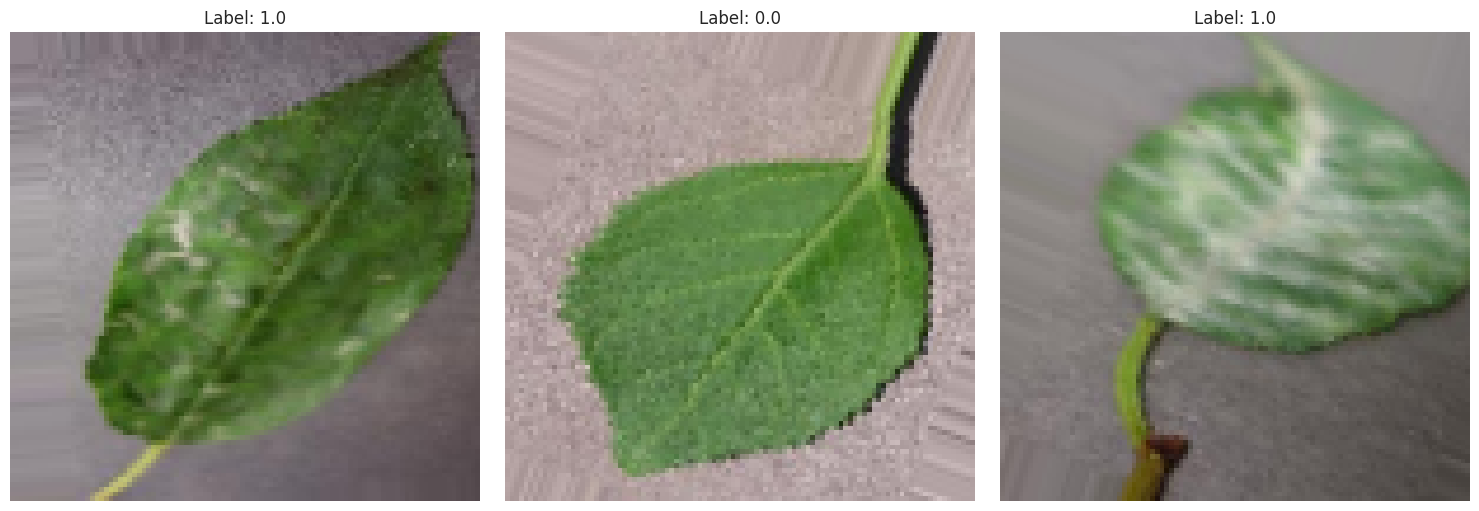

In [14]:
def plot_images(images_arr, labels_arr, num_images=3):
    """
    Take an array of images and labels, and an optional
    num_images parameter specifying how many images to plot
    """
    # Ensure not to try to plot more images than we have
    num_images = min(num_images, len(images_arr))

    # Set up the plot with one row and 'num_images' columns
    # Figure size is dynamically adjusted based on the number of images
    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))
    if num_images == 1:
        axes = [axes]

    # Loop through the first 'num_images' images and plot them
    for i in range(num_images):
        # Get the subplot axis
        ax = axes[i]
        # Get the image
        img = images_arr[i]
        # Get the label
        label = labels_arr[i]
        # Show the image on the subplot
        ax.imshow(img)
        # Set the title of the subplot to the image's label
        ax.set_title(f"Label: {label}")
        # Turn off the axis to only show the image
        ax.axis('off')

    # Adjust the layout so everything fits without overlapping
    plt.tight_layout()
    plt.show()

# Fetch a batch of images and labels from the train_set iterator
images, labels = next(train_set)

# Plot the first 3 images from the batch
plot_images(images, labels, num_images=3)

- Plot augmented validation and test images

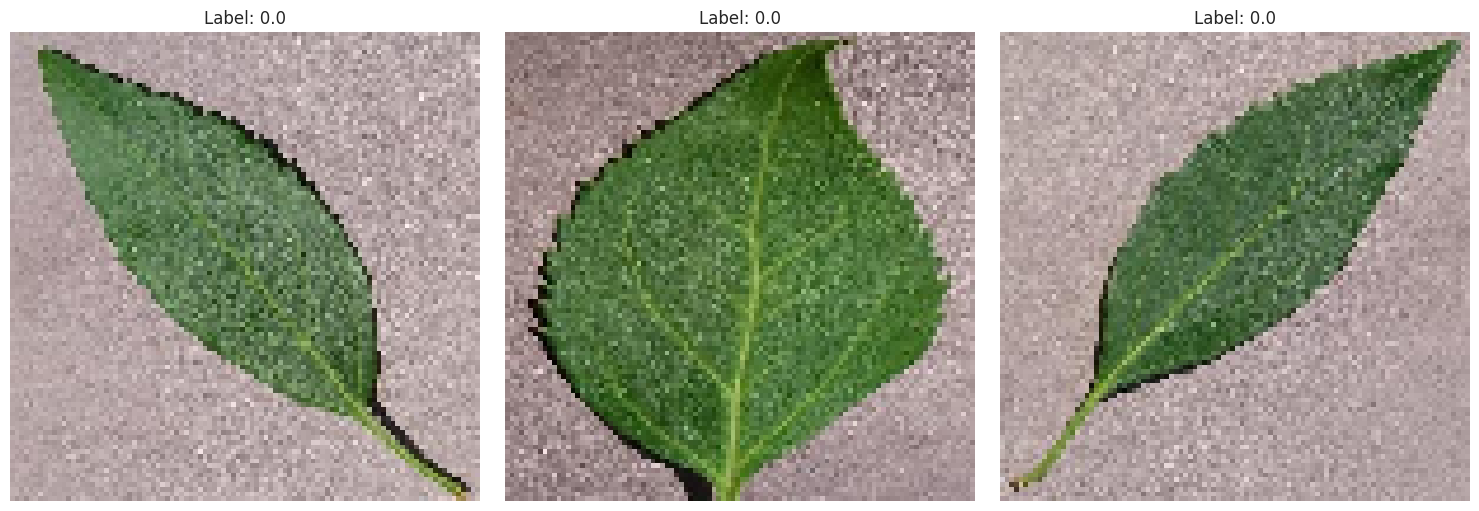

In [15]:
# Fetch a batch of images and labels from the validation_set iterator
images, labels = next(validation_set)

# Plot the first 3 images from the batch
plot_images(images, labels, num_images=3)

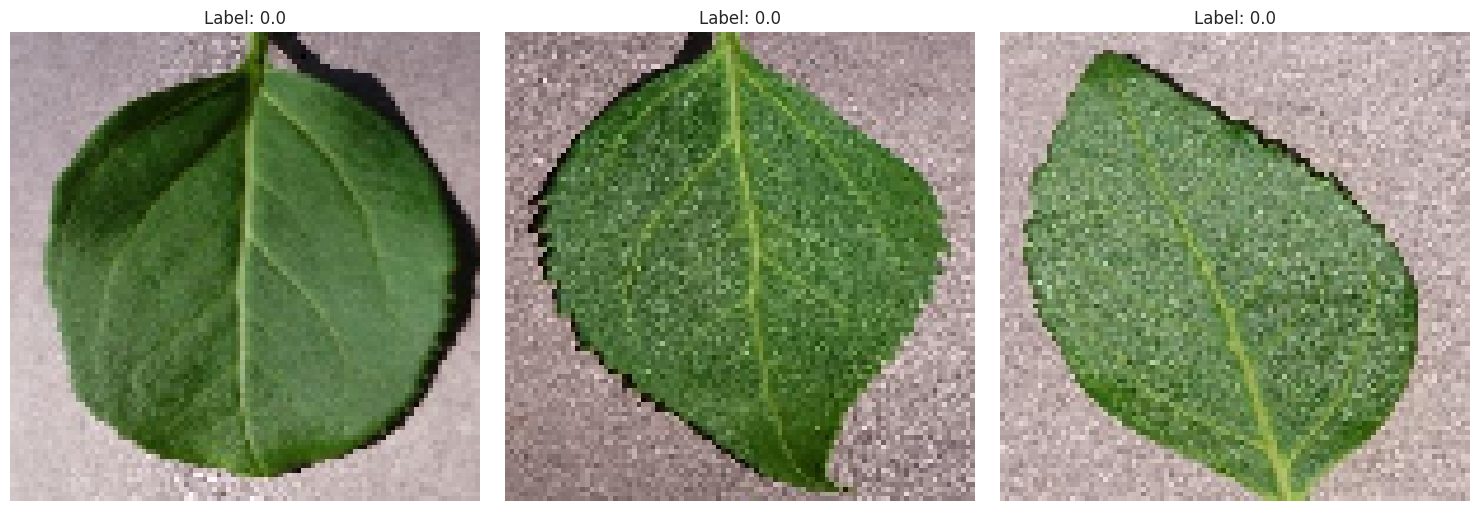

In [16]:
# Fetch a batch of images and labels from the test_set iterator
images, labels = next(test_set)

# Plot the first 3 images from the batch
plot_images(images, labels, num_images=3)

3. **Save class_indices**

In [17]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

________________________________________________________________
### Model Creation and Training
________________________________________________________________

Import model packages


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Activation,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    GlobalAveragePooling2D,
    Input
)
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
import pickle

4. **Machine learning model creation and training**

In [19]:
def create_tf_model(image_shape=(100, 100, 3), l2_reg=0.01):
    """
    Create a TensorFlow CNN model with specific hyperparameters.
    Adjust the model's complexity based on the dataset to prevent overfitting.
    """

    # model hyperparameters
    filters = [32, 64]
    kernel_size = (3, 3)
    activation = 'relu'
    dense_units = 64
    dropout_rate = 0.5

    # Initialize the Sequential model
    model = Sequential()

    # Add the Convolutional layers with GlobalAveragePooling2D and L2 Regularization
    model.add(Conv2D(filters=filters[0], kernel_size=kernel_size,
                     activation=activation, input_shape=image_shape,
                     padding='same', kernel_regularizer=l2(l2_reg)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=filters[1], kernel_size=kernel_size,
                     activation=activation, padding='same',
                     kernel_regularizer=l2(l2_reg)))
    model.add(MaxPooling2D(pool_size=(2, 2)), GlobalAveragePooling2D())

    # Flatten the convolved images so we can connect them to Dense layers
    model.add(Flatten())

    # Add the Dense layers, including Dropout for regularization
    model.add(Dense(dense_units, activation=activation))
    model.add(Dropout(dropout_rate))

    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer and binary_crossentropy loss
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

Early Stopping and Learning Rate Scheduler

In [20]:
# Use a learning rate scheduler
def scheduler(epoch, lr):
    """
    This function defines a learning rate scheduler for training
    a neural network model.

    Parameters:
    epoch (int): The current epoch number during training.
    lr (float): The current learning rate of the optimizer.

    Returns:
    float: The updated learning rate based on the current epoch number.
    """

    # Check if the current epoch number is less than 10
    if epoch < 10:
        # If the epoch number is less than 10, return the current learning rate unchanged.
        return float(lr)
    else:
        # If the epoch number is 10 or higher, apply an exponential decay to the learning rate.
        return float(lr * tf.math.exp(-0.1))

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Learning rate scheduler to reduce the learning rate over time
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

Model Summary

In [21]:
model = create_tf_model()
model.summary()

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,560,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,579,521 (9.84 MB)

 Trainable params: 2,579,521 (9.84 MB)

 Non-trainable params: 0 (0.00 B)

Fit model for model training

In [37]:
history = model.fit(
    train_set,
    epochs=25,
    validation_data=validation_set,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

Epoch 1/25


148/148 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.9683 - loss: 0.1291 - val_accuracy: 0.9857 - val_loss: 0.1010 - learning_rate: 0.0010
Epoch 2/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - accuracy: 0.9894 - loss: 0.0791 - val_accuracy: 0.9952 - val_loss: 0.0649 - learning_rate: 0.0010
Epoch 3/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.9867 - loss: 0.0779 - val_accuracy: 0.9952 - val_loss: 0.0514 - learning_rate: 0.0010
Epoch 4/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - accuracy: 0.9831 - loss: 0.0820 - val_accuracy: 0.9952 - val_loss: 0.0512 - learning_rate: 0.0010
Epoch 5/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.9874 - loss: 0.0754 - val_accuracy: 0.9929 - val_loss: 0.0617 - learning_rate: 0.0010
Epoch 6/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - accuracy: 0.9895 - loss: 0.0661 - val_accuracy: 0.9952 - val_loss: 0.0478 - learning_rate: 0.0010
Epoch 7/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.9878 - loss:

5. **Save model**

In [23]:
model.save('outputs/v1/powdery_mildew_detector_model.keras')

_______________________________________________________________________________

### Model Performace
____________________________________________________________________________________

6. **Learning curve plot for model performance**

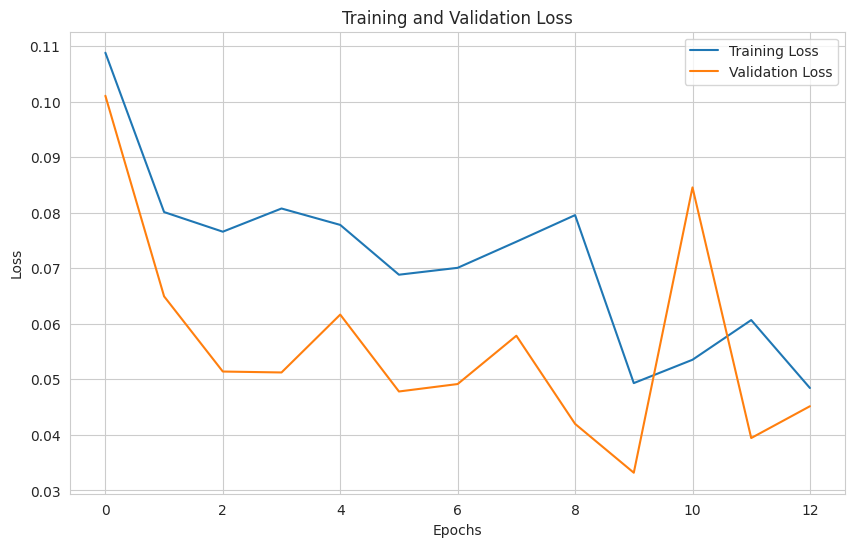

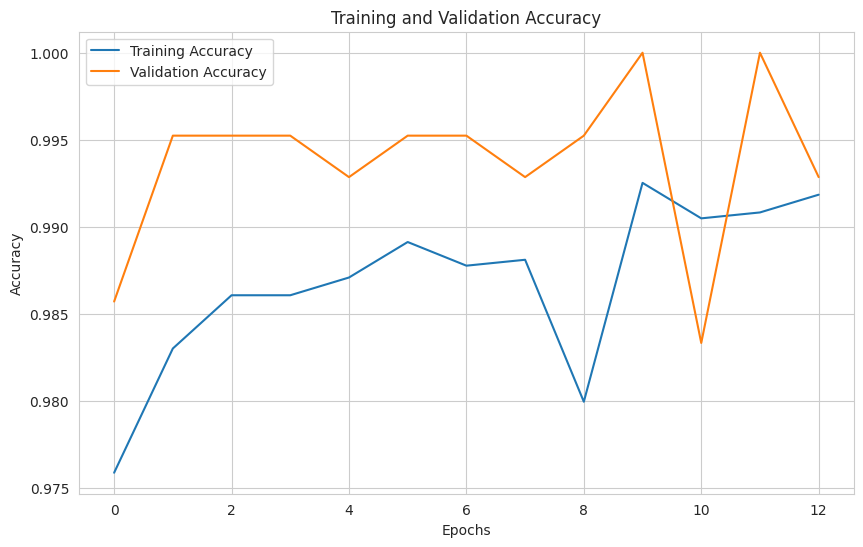

In [38]:
# Plot training history
def plot_training_history(history):

    # Plot for loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
    plt.show()

    # Plot for accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
    plt.show()

plot_training_history(history)

___________________________________________________________________________________
### Model Evaluation
___________________________________________________________________________________

Load saved model

In [25]:
model = load_model('outputs/v1/powdery_mildew_detector_model.keras')

7. **Model evaluation on pickle file**

Evaluate model on test set

In [26]:
evaluation = model.evaluate(test_set)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9930 - loss: 0.0624


Save evaluation pickle

In [27]:
joblib.dump(value=evaluation ,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

________________________________________________________________________________
### Predict on new data
________________________________________________________________________________

8. **Prediction on the random image file**

Set label names

In [28]:
labels = os.listdir(train_path)
print('Label for the images are',labels)

Label for the images are ['healthy', 'powdery_mildew']


Load a random image as PIL

Selected label for prediction: powdery_mildew
Image path for prediction: inputs/cherry_leaves_dataset/cherry-leaves/test/powdery_mildew/5be6f819-7f95-4078-bc8a-320b79dd5bee___FREC_Pwd.M 4706.JPG
Image shape: (100, 100), Image mode: RGB


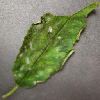

In [29]:
# Select the 201th image
pointer = 200

label = labels[1]
print("Selected label for prediction:", label)

image_shape=(100, 100, 3)

# Check if the label is a string.
if not isinstance(label, str):
    raise TypeError(f"Expected label to be a string, but got {type(label)}.")

# Get the list of files in the label's directory.
files = os.listdir(os.path.join(test_path, label))

# Check if pointer is within the range of files.
if not 0 <= pointer < len(files):
    raise IndexError(f"Pointer {pointer} is out of range for the number of files {len(files)}.")

# Load a random image from the test set.
pil_image_path = os.path.join(test_path, label, files[pointer])
pil_image = image.load_img(pil_image_path, target_size=image_shape, color_mode='rgb')

print("Image path for prediction:", pil_image_path)

print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

Convert image to array and prepare for prediction

In [30]:
# Convert the PIL image to a numpy array
my_image = image.img_to_array(pil_image) / 255.0

# Preprocess the image for the model by adding a batch dimension
my_image = np.expand_dims(my_image, axis=0)
print(f'Preprocessed image shape: {my_image.shape}')

Preprocessed image shape: (1, 100, 100, 3)


Predict class probabilities

In [31]:
# Predict class probabilities using the model
pred_proba = model.predict(my_image)[0]
# Create a reversed mapping from indices to classes
target_map = {v: k for k, v in train_set.class_indices.items()}
# Get the index of the highest probability
pred_class_index = int(pred_proba > 0.5)
# Get the corresponding class label from target_map
pred_class = target_map[pred_class_index]
# Get the confidence of the prediction
pred_confidence = pred_proba if pred_class_index == 1 else 1 - pred_proba

print(f"Predicted class: {pred_class}, with probability: {pred_confidence}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted class: powdery_mildew, with probability: [0.9999981]


/tmp/ipykernel_141733/2833015650.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_class_index = int(pred_proba > 0.5)


9. **Model evaluation metrics results**

precision_score, recall_score, f1_score metrics

In [32]:
y_pred = model.predict(test_set)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred.flatten()]

# Calculate the metrics
precision = precision_score(test_set.labels, y_pred, average='binary')
recall = recall_score(test_set.labels, y_pred, average='binary')
f1 = f1_score(test_set.labels, y_pred, average='binary')

print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Precision: 0.9975903614457832, Recall: 0.981042654028436, F1-Score: 0.989247311827957


Compute Confusion Matrix and ROC Curve

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       422
           1       1.00      0.98      0.99       422

    accuracy                           0.99       844
   macro avg       0.99      0.99      0.99       844
weighted avg       0.99      0.99      0.99       844



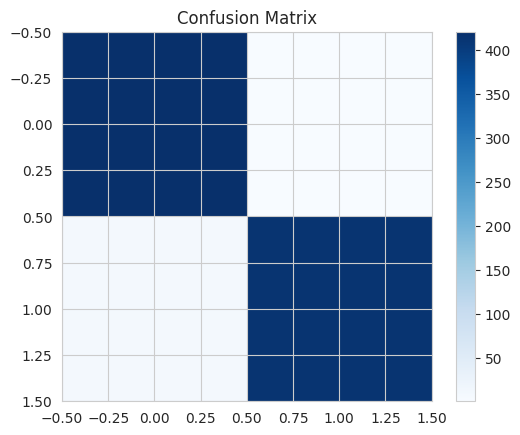

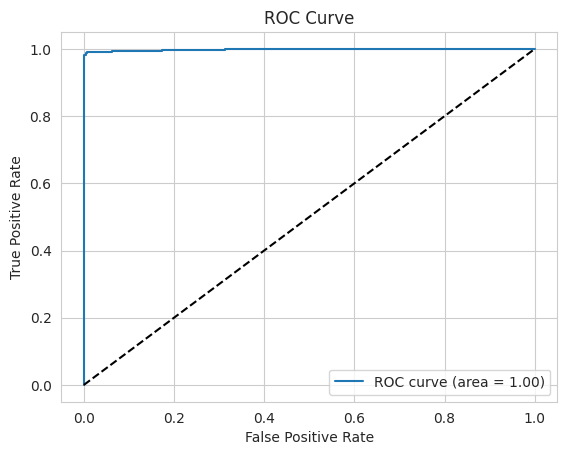

In [33]:
y_true = np.array(test_set.labels)
y_pred = model.predict(test_set)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()

# Compute metrics
print(classification_report(y_true, y_pred_binary))
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.savefig('outputs/v1/confusion_matrix.png')

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('outputs/v1/roc_curve.png')

__________________________________________________________________________________
### Hypothesis
__________________________________________________________________________________

10. **Hypothesis on Image Resolution**

In [34]:
input_shapes = {'low': (64, 64), 'medium': (128, 128), 'high': (256, 256)}

def validate_resolution_hypothesis(train_path, val_path, test_path, input_shapes):
    accuracies = {}
    for name, size in input_shapes.items():
        print(f"Testing with resolution: {size}")

        # Initialize the model for the current resolution
        model = create_tf_model(image_shape=size + (3,))

        # Data preparation
        train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
            train_path, target_size=size, batch_size=20, class_mode='binary')
        val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
            val_path, target_size=size, batch_size=20, class_mode='binary')
        test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
            test_path, target_size=size, batch_size=20, class_mode='binary')

        # Fit the model
        early_stop = EarlyStopping(monitor='val_loss', patience=3)
        history = model.fit(
            train_gen,
            epochs=10,
            validation_data=val_gen,
            callbacks=[early_stop],
            verbose=1)

        # Get the last validation accuracy from the history object
        val_accuracy = history.history['val_accuracy'][-1]

        # Evaluate the model on the test set
        test_loss, test_accuracy = model.evaluate(test_gen, verbose=1)

        accuracies[name] = test_accuracy

    print("Accuracy by resolution:", accuracies)

validate_resolution_hypothesis(train_path, val_path, test_path, input_shapes)

Testing with resolution: (64, 64)
Found 2944 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 844 images belonging to 2 classes.
Epoch 1/10


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


  1/148 ━━━━━━━━━━━━━━━━━━━━ 3:00 1s/step - accuracy: 0.4000 - loss: 1.2066

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.7231 - loss: 0.7927 - val_accuracy: 0.9762 - val_loss: 0.2221
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9675 - loss: 0.2355 - val_accuracy: 0.9881 - val_loss: 0.1352
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9835 - loss: 0.1379 - val_accuracy: 0.9929 - val_loss: 0.0894
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9883 - loss: 0.1093 - val_accuracy: 0.9929 - val_loss: 0.0921
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9869 - loss: 0.1024 - val_accuracy: 0.9929 - val_loss: 0.0726
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.9884 - loss: 0.1001 - val_accuracy: 0.9952 - val_loss: 0.0635
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9945 - loss: 0.0722 - val_accuracy: 0.9952 - val_loss: 0.0657
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9940 - loss: 0.0728 - val_accuracy: 0.995

11. **Hypothesis on Data Augmentation**

In [35]:
image_shape = (100, 100, 3)
batch_size = 20

def validate_augmentation_hypothesis(train_path, val_path, test_path, image_shape, batch_size):
    # Set up data generators
    aug_gen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.10,
        height_shift_range=0.10,
        shear_range=0.10,
        zoom_range=0.10,
        horizontal_flip=True,
        fill_mode='nearest',
        rescale=1./255
    )
    no_aug_gen = ImageDataGenerator(rescale=1./255)

    # Prepare the data
    train_set_no_aug = no_aug_gen.flow_from_directory(train_path, target_size=image_shape[:2], batch_size=batch_size, class_mode='binary', shuffle=True)
    train_set_aug = aug_gen.flow_from_directory(train_path, target_size=image_shape[:2], batch_size=batch_size, class_mode='binary', shuffle=True)
    test_set = no_aug_gen.flow_from_directory(test_path, target_size=image_shape[:2], batch_size=batch_size, class_mode='binary', shuffle=False)

    # Model training without augmentation
    model_no_aug = create_tf_model(image_shape=image_shape)
    model_no_aug.fit(train_set_no_aug, epochs=10, verbose=1)

    # Model training with augmentation
    model_with_aug = create_tf_model(image_shape=image_shape)
    model_with_aug.fit(train_set_aug, epochs=10, verbose=1)

    # Evaluation
    test_labels = test_set.classes
    predictions_no_aug = model_no_aug.predict(test_set)
    predictions_with_aug = model_with_aug.predict(test_set)

    # Threshold predictions to binary
    predictions_no_aug = (predictions_no_aug > 0.5).astype(int).flatten()
    predictions_with_aug = (predictions_with_aug > 0.5).astype(int).flatten()

    # Calculate metrics
    accuracy_no_aug = accuracy_score(test_labels, predictions_no_aug)
    precision_no_aug = precision_score(test_labels, predictions_no_aug)
    recall_no_aug = recall_score(test_labels, predictions_no_aug)
    f1_no_aug = f1_score(test_labels, predictions_no_aug)

    accuracy_with_aug = accuracy_score(test_labels, predictions_with_aug)
    precision_with_aug = precision_score(test_labels, predictions_with_aug)
    recall_with_aug = recall_score(test_labels, predictions_with_aug)
    f1_with_aug = f1_score(test_labels, predictions_with_aug)

    print(f"Without Augmentation - Accuracy: {accuracy_no_aug}, Precision: {precision_no_aug}, Recall: {recall_no_aug}, F1: {f1_no_aug}")
    print(f"With Augmentation - Accuracy: {accuracy_with_aug}, Precision: {precision_with_aug}, Recall: {recall_with_aug}, F1: {f1_with_aug}")

validate_augmentation_hypothesis(train_path, val_path, test_path, image_shape, batch_size)

Found 2944 images belonging to 2 classes.
Found 2944 images belonging to 2 classes.
Found 844 images belonging to 2 classes.
Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - accuracy: 0.7036 - loss: 0.8276
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.9815 - loss: 0.1977
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.9886 - loss: 0.1261
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.9845 - loss: 0.1214
Epoch 5/10
 71/148 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.9928 - loss: 0.0882

KeyboardInterrupt: 

___________________________________________________________________________________
### Push files to Repo
___________________________________________________________________________________

Push generated/new files from this Session to GitHub repo

- .gitignore

In [ ]:
!cat .gitignore

- Git status

In [ ]:
!git status

- Git add

In [ ]:

!git add .

- Git commit

In [ ]:
!git commit -am " Add new plots"

- Git Push

In [ ]:
!git push

__________________________________________________________________________________